In [136]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introducción a Python

##### Graficando usando `matplotlib`

In [137]:
import matplotlib.pyplot as plt
import numpy as np

In [138]:
g = -9.8
vinitial = 10
H = 201

Con `np.linspace` se crea un arreglo de números igualmente espaciados sobre un intervalo.

In [139]:
t = np.linspace(start=0,stop=7.5,num=10)

In [140]:
t

array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
       4.16666667, 5.        , 5.83333333, 6.66666667, 7.5       ])

In [141]:
def posicion(x0,v0,a,t):
    '''
    Esta función retorna la posición de un objeto dado una posición y velocidad inicial, aceleración y tiempo.

    Parámetros
    ----------
    x0: float
        La posición inicial de un objeto
    v0: float
        La velocidad inicial de un objeto
    a: float
        La aceleración de un objeto, asumida constante
    t: float
        El tiempo en el cual se quiere calcular la posición
    '''
    return x0+v0*t+0.5*a*(t**2)

In [142]:
y = posicion(x0=H,v0=vinitial,a=g,t=t)

Veamos que ahora `y` también es un arreglo de 10 elementos, todos asociados a las posiciones del arreglo de tiempos `t`.

In [143]:
y

array([201.        , 205.93055556, 204.05555556, 195.375     ,
       179.88888889, 157.59722222, 128.5       ,  92.59722222,
        49.88888889,   0.375     ])

In [144]:
def velocidad(v0,a,t):
    '''
    Esta función retorna la velocidad de un objeto dado una velocidad inicial, aceleración y tiempo.

    Parámetros
    ----------
    v0: float
        La velocidad inicial de un objeto
    a: float
        La aceleración de un objeto, asumida constante
    t: float
        El tiempo en el cual se quiere calcular la posición
    '''
    return v0+a*t

In [145]:
v = velocidad(v0=vinitial,a=g,t=t)

In [146]:
v

array([ 10.        ,   1.83333333,  -6.33333333, -14.5       ,
       -22.66666667, -30.83333333, -39.        , -47.16666667,
       -55.33333333, -63.5       ])

Note que también se puede calcular la velocidad para un tiempo específico

In [147]:
velocidad(v0=vinitial,a=g,t=10)

-88.0

O para un elemento del arreglo tiempo

In [148]:
velocidad(v0=vinitial,a=g,t=t[2])

-6.333333333333336

Para la aceleración, necesitamos un arreglo de la misma longitud que la del tiempo. Para esto, utilizamos la función `np.tile` que replica un valor el número de veces especificado por parámetro:

In [149]:
vector_a = np.tile(g,reps=len(t))
vector_a

array([-9.8, -9.8, -9.8, -9.8, -9.8, -9.8, -9.8, -9.8, -9.8, -9.8])

Primero, construimos una figura utilizando la función `plt.subplots` de matplotlib.pyplot. Esta retorna un objeto `plt.Figure` el que asignamos a la variable `fig` y un arreglo de ejes, el que le asignamos a la variable `axs`

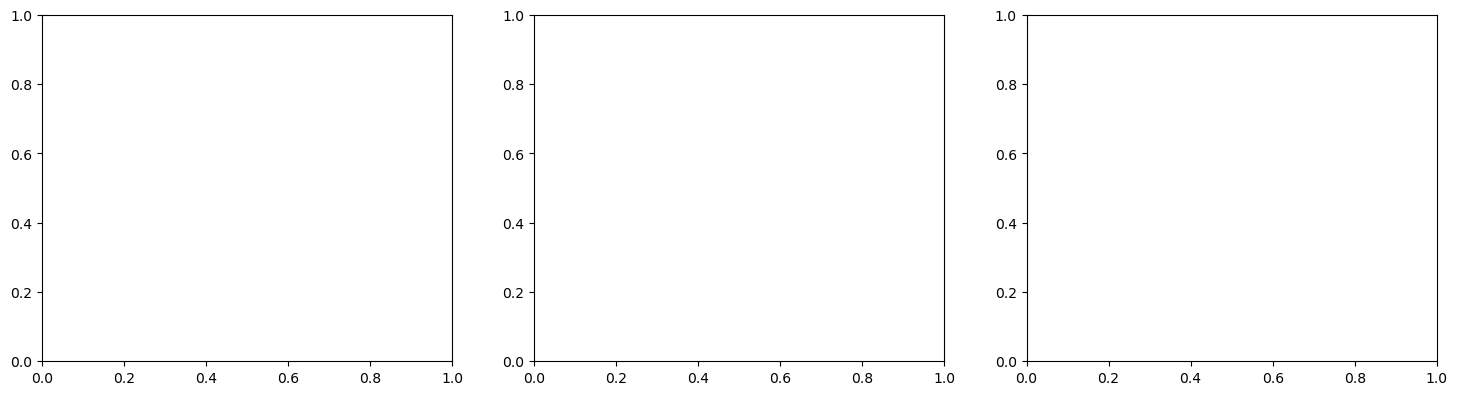

In [150]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(18,4.5))


In [151]:
type(fig)

matplotlib.figure.Figure

In [152]:
type(axs)

numpy.ndarray

Graficamos entonces en nuestro primer eje, `axs[0]` utilizando el comando `.scatter()` que construye un gráfico de dispersión. Es importante ponerle nombre a los ejes y título a cada gráfica.

In [153]:
axs[0].scatter(x=t,y=y)
axs[0].set_ylabel(r'Posición, y(m)')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_title('Posición vs tiempo')

Text(0.5, 1.0, 'Posición vs tiempo')

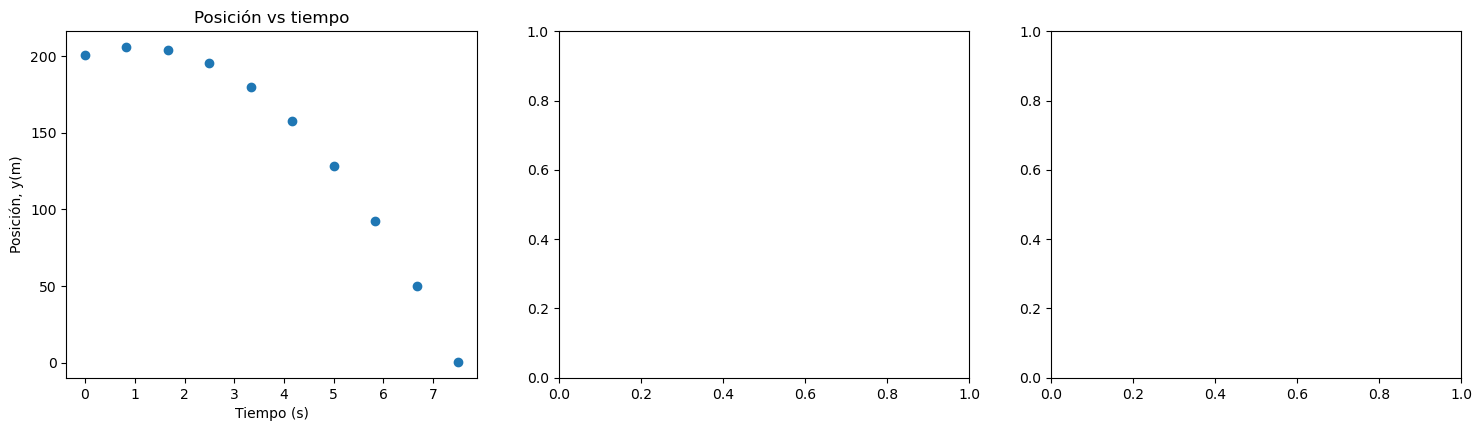

In [154]:
fig

Los gráficos de dispersión se pueden personalizar cambiando su color (`c`), su tipo de marcador (`marker`) y su tamaño (`s`)

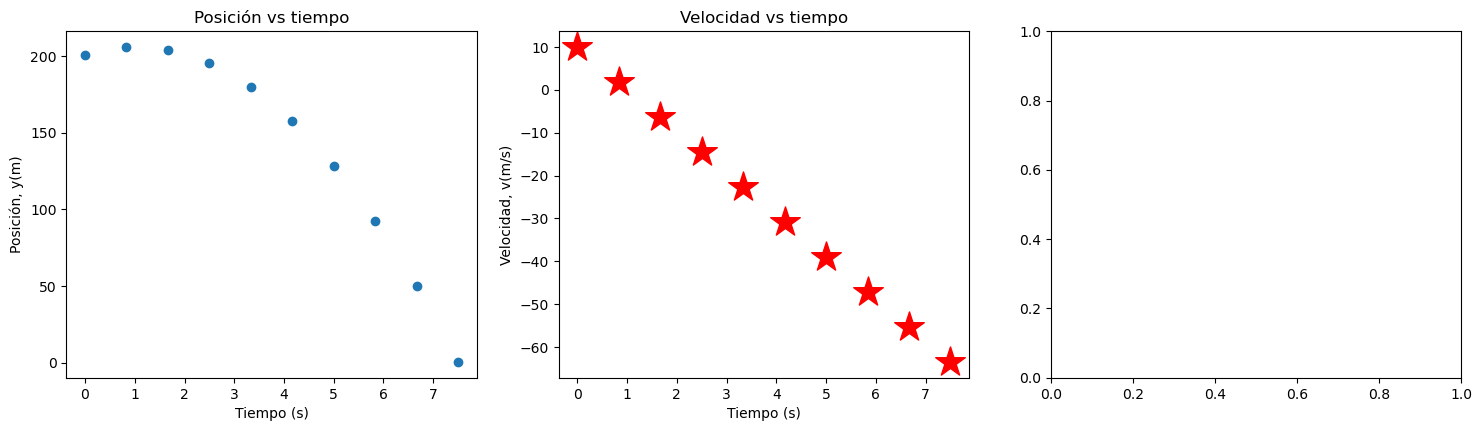

In [155]:
axs[1].scatter(t,v,c='red',marker='*',s=500)
axs[1].set_ylabel(r'Velocidad, v(m/s)')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_title('Velocidad vs tiempo')
fig

In [156]:
axs[2].plot(t,np.tile(g,len(t)),c='#d822e6',linewidth=4)
axs[2].set_ylabel(r'Aceleración, a($m/s^2$)')
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_title('Aceleración vs tiempo')

Text(0.5, 1.0, 'Aceleración vs tiempo')

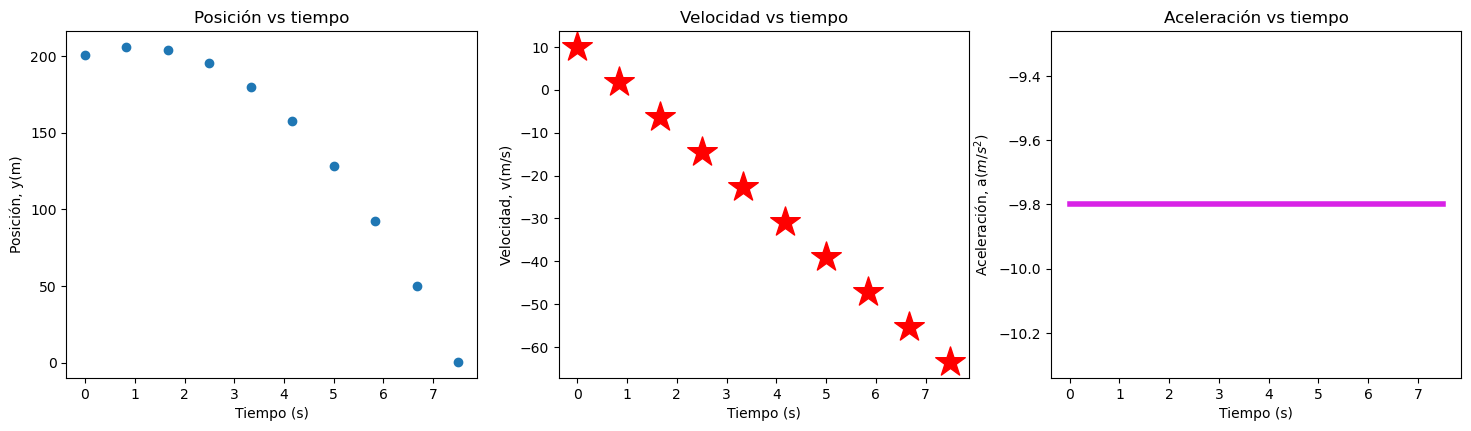

In [157]:
fig

La biblioteca de matplotlib no sólo tiene elementos para graficar funciones, también permite dibujar objetos geométricos.

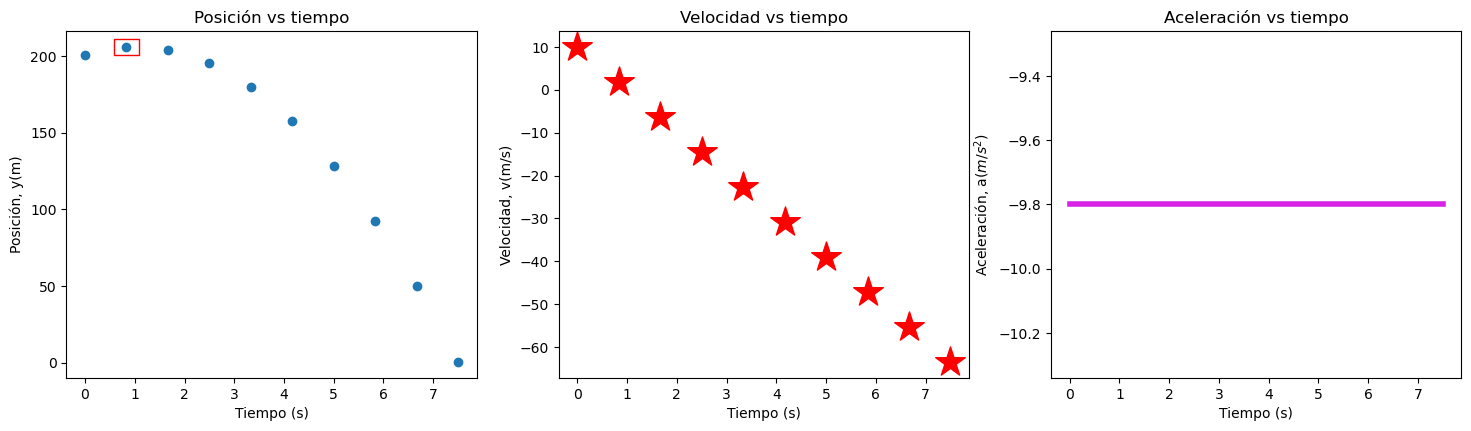

In [158]:
from matplotlib.patches import Rectangle

axs[0].add_patch(Rectangle(xy=(t[1]-0.5/2,y[1]-10/2),width=0.5,height=10,fill=False,edgecolor='red'))
fig

Para guardar la figura, utilizamos el siguiente comando:

In [160]:
fig.savefig('./ejemplo.pdf')

##### Programación orientada a objetos

Una clase es una plantilla para la creación de objetos. Las clases cuentan con **atributos** que tendrán los objetos y con métodos o **funciones**.

Una clase en Python se define utilizando la siguiente estructura

```python
class Carro:

Dentro de esta, habrá atributos (variables) y métodos (funciones). El método más importante es el **constructor** que da las instrucciones para crear un objeto de la clase.

In [11]:
class Carro:

    def __init__(self, marca,pasajeros,color,velocidad):
        self.marca = marca
        self.num_pasajeros = pasajeros
        self.color = color
        self.velocidad = velocidad

    def aumentar_velocidad(self):
        '''
        Este metodo aumenta la velocidad
        '''
        self.velocidad = self.velocidad+1
        print(f'La velocidad ahora es {self.velocidad}')

    def frenar(self):
        self.velocidad = 0
        print(f'El carro está quieto.')


In [2]:
carro1 = Carro(marca="BMW",pasajeros=4,color="rojo",velocidad=7.5)

In [3]:
carro1

In [4]:
carro2 = Carro("Toyota",7,"gris",10)

In [5]:
carro1.velocidad

7.5

In [6]:
carro1.aumentar_velocidad()

La velocidad ahora es 8.5


In [7]:
carro1.velocidad

8.5

In [8]:
carro2.frenar()

El carro está quieto.


In [9]:
carro2.velocidad

0

Ahora veamos un ejemplo más avanzado. Construyamos la clase para un evento sísmico que incluya:
- La hora local a la que se registró
- La magnitud
- El lugar donde se registró
- La agencia que lo registró

Si asumimos que el lugar se registra como "Municipio - Departamento, País", construya un método para retornar el país, otro el municipio y otro el departamento. 

Construya un método para verificar si la agencia que lo registró es "SGC" (Servicio Geológico Colombiano)

In [16]:
lugar = 'Zapatoca - Santander, Colombia'

In [29]:
lugar.split('-')[0]

'Zapatoca '

In [28]:
lugar.split('-')[1].split(',')[0]

' Santander'

In [22]:
lugar.split(',')[1].strip()

'Colombia'

In [34]:
from clase_sismo import EventoSismico

In [35]:
EventoSismico('23:59',magnitud=5.6,lugar='Zapatoca - Santander, Colombia',agencia='SGC')

In [41]:
f = open('./sismos.csv')
lineas = f.readlines()
f.close()

In [161]:
lineas[:5]

['num;rms;felt;sm;magType;agency;cdi;gap;localTime;place;mag;mmi;nst;maxPGA\n',
 '0;1.2;9;False;MLr_3;SGC;3;61.0;2023-08-22 05:32;Zapatoca - Santander, Colombia;2.7;;45;\n',
 '1;1.0;47;False;MLr_3;SGC;4;49.0;2023-08-22 05:23;Medina - Cundinamarca, Colombia;3.5;;65;\n',
 '2;1.2;17;False;MLr_3;SGC;4;62.0;2023-08-21 22:08;Zapatoca - Santander, Colombia;2.6;;43;\n',
 '3;1.3;6;False;MLr_3;SGC;2;62.0;2023-08-21 08:20;Zapatoca - Santander, Colombia;3.7;;66;\n']

In [162]:
for k in lineas[:5]:
    print(k.strip().split(';'))

['num', 'rms', 'felt', 'sm', 'magType', 'agency', 'cdi', 'gap', 'localTime', 'place', 'mag', 'mmi', 'nst', 'maxPGA']
['0', '1.2', '9', 'False', 'MLr_3', 'SGC', '3', '61.0', '2023-08-22 05:32', 'Zapatoca - Santander, Colombia', '2.7', '', '45', '']
['1', '1.0', '47', 'False', 'MLr_3', 'SGC', '4', '49.0', '2023-08-22 05:23', 'Medina - Cundinamarca, Colombia', '3.5', '', '65', '']
['2', '1.2', '17', 'False', 'MLr_3', 'SGC', '4', '62.0', '2023-08-21 22:08', 'Zapatoca - Santander, Colombia', '2.6', '', '43', '']
['3', '1.3', '6', 'False', 'MLr_3', 'SGC', '2', '62.0', '2023-08-21 08:20', 'Zapatoca - Santander, Colombia', '3.7', '', '66', '']


In [164]:
for k in lineas[1:6]:
    print(k.strip().split(';'))

['0', '1.2', '9', 'False', 'MLr_3', 'SGC', '3', '61.0', '2023-08-22 05:32', 'Zapatoca - Santander, Colombia', '2.7', '', '45', '']
['1', '1.0', '47', 'False', 'MLr_3', 'SGC', '4', '49.0', '2023-08-22 05:23', 'Medina - Cundinamarca, Colombia', '3.5', '', '65', '']
['2', '1.2', '17', 'False', 'MLr_3', 'SGC', '4', '62.0', '2023-08-21 22:08', 'Zapatoca - Santander, Colombia', '2.6', '', '43', '']
['3', '1.3', '6', 'False', 'MLr_3', 'SGC', '2', '62.0', '2023-08-21 08:20', 'Zapatoca - Santander, Colombia', '3.7', '', '66', '']
['4', '0.7', '5', 'False', 'MLr_3', 'SGC', '4', '41.0', '2023-08-21 05:45', 'Guayabetal - Cundinamarca, Colombia', '2.1', '', '29', '']


In [165]:
evento_sismico_ejemplo = lineas[17].strip().split(';')
print(evento_sismico_ejemplo)

['18', '0.8', '13', 'False', 'MLr_3', 'SGC', '3', '42.0', '2023-08-19 06:56', 'Villavicencio - Meta, Colombia', '2.8', '', '48', '']


In [166]:
horalocal = evento_sismico_ejemplo[8]
magnitud = evento_sismico_ejemplo[10]
lugar = evento_sismico_ejemplo[9]
agencia = evento_sismico_ejemplo[5]

In [167]:
magnitud

'2.8'

In [168]:
sismo1 = EventoSismico(horalocal,magnitud,lugar,agencia)

In [169]:
sismo1.horaLocal

'2023-08-19 06:56'

In [170]:
sismo1.magnitud

2.8

In [171]:
sismo1.agencia_SGC()

True

In [172]:
sismo1.municipio()

'Villavicencio'

In [173]:
sismo1.departamento()

'Meta'

In [174]:
sismo1.pais()

'Colombia'

In [175]:
sismos = []

for k in lineas[1:]:
    evento_sismico_ejemplo = k.strip().split(';')

    horalocal = evento_sismico_ejemplo[8]
    magnitud = evento_sismico_ejemplo[10]
    lugar = evento_sismico_ejemplo[9]
    agencia = evento_sismico_ejemplo[5]
    
    sismo_i = EventoSismico(horalocal,magnitud,lugar,agencia)

    sismos.append(sismo_i)

In [176]:
sismos[:5]

In [178]:
for sismo in sismos:
    if sismo.magnitud>=5:
        print(sismo.municipio(),sismo.horaLocal,sismo.magnitud)

Restrepo 2023-08-17 20:15 5.1
Villavicencio 2023-08-17 12:17 5.6
El Calvario 2023-08-17 12:04 6.1
